In [1]:
import pandas as pd 
import glob
from sklearn.model_selection import train_test_split 
import plotly.graph_objs as go
import matplotlib as plt
import plotly as pl 
import numpy as np
import bokeh
import matplotlib.pyplot as plt
import pandas_datareader.data as web
from datetime import *
from plotly.graph_objs import Scatter, Layout
from pandas.io.json import json_normalize
from fbprophet import Prophet

In [2]:
pl.tools.set_credentials_file(username='HerbertGourout', api_key='rCfamr0DHh0nnioBytM9')

In [3]:
path = r'data'
allfile =  glob.glob(path+'/*.json')
#df=pd.read_json(Allfile[0],orient='index')
allfile.sort()

In [4]:
import json

dfs=[]
for file in allfile:
    with open(file) as data_file:
        data = json.load(data_file)
        res = json_normalize(data)
       # print(res)
        dfs.append(res)
    
train_data = pd.concat(dfs,ignore_index=True)
train_data=train_data.drop(['closePrice.lastTraded','highPrice.lastTraded',
                            'lowPrice.lastTraded','openPrice.lastTraded'],axis=1)

In [13]:
train_data.shape

(2555, 11)

### Les plots

In [5]:
df= train_data
trace1=go.Scatter(x=df.snapshotTime, y=df['openPrice.bid'], name="Open", line = dict(color = '#17BECF'), opacity = 0.8)
trace2=go.Scatter(x=df.snapshotTime, y=df['highPrice.bid'], name="HIGH", line=dict(color='#7F7F7F'), opacity=0.8)
trace3=go.Scatter(x=df.snapshotTime, y=df['closePrice.bid'], name="Close", line=dict(color='red'), opacity=0.8)
trace4=go.Scatter(x=df.snapshotTime, y=df['lowPrice.bid'], name="Low", line = dict(color = '#33CFA5'), opacity = 0.8)

### Add mean to graph

In [6]:
"""
trace_1_avg = go.Scatter(x=df.snapshotTime,
                            y=[df.Open.mean()]*len(df.snapshotTime),
                            name='Open Average',
                            visible=False,
                            line=dict(color='#17BECF', dash='dash'))

trace_2_avg = go.Scatter(x=df.snapshotTime,
                            y=[df.High.mean()]*len(df.snapshotTime),
                            name='High Average',
                            visible=False,
                            line=dict(color='#7F7F7F', dash='dash'))

trace_3_avg = go.Scatter(x=df.snapshotTime,
                            y=[df.Low.mean()]*len(df.snapshotTime),
                            name='Low Average',
                            visible=False,
                            line=dict(color='#red', dash='dash'))

trace_4_avg = go.Scatter(x=df.snapshotTime,
                            y=[df.Close.mean()]*len(df.snapshotTime),
                            name='Close Average',
                            visible=False,
                            line=dict(color='#33CFA5', dash='dash'))"""
data=[trace1,trace2,trace3,trace4]
#data1=[trace2,trace_2_avg,trace3,trace_3_avg]


### Annotation

In [7]:
"""
high_annotations=[dict(x='2018-03-01',
                       y=df.High.mean(),
                       xref='x', yref='y',
                       text='High Average:<br>'+str(df.High.mean()),
                       ax=0, ay=-40),
                  dict(x=df.High.idxmax(),
                       y=df.High.max(),
                       xref='x', yref='y',
                       text='High Max:<br>'+str(df.High.max()),
                       ax=0, ay=-40)]
low_annotations=[dict(x='2013-05-01',
                      y=df.Low.mean(),
                      xref='x', yref='y',
                      text='Low Average:<br>'+str(df.Low.mean()),
                      ax=0, ay=40),
                 dict(x=df.High.idxmin(),
                      y=df.Low.min(),
                      xref='x', yref='y',
                      text='Low Min:<br>'+str(df.Low.min()),
                      ax=0, ay=40)]"""

"\nhigh_annotations=[dict(x='2018-03-01',\n                       y=df.High.mean(),\n                       xref='x', yref='y',\n                       text='High Average:<br>'+str(df.High.mean()),\n                       ax=0, ay=-40),\n                  dict(x=df.High.idxmax(),\n                       y=df.High.max(),\n                       xref='x', yref='y',\n                       text='High Max:<br>'+str(df.High.max()),\n                       ax=0, ay=-40)]\nlow_annotations=[dict(x='2013-05-01',\n                      y=df.Low.mean(),\n                      xref='x', yref='y',\n                      text='Low Average:<br>'+str(df.Low.mean()),\n                      ax=0, ay=40),\n                 dict(x=df.High.idxmin(),\n                      y=df.Low.min(),\n                      xref='x', yref='y',\n                      text='Low Min:<br>'+str(df.Low.min()),\n                      ax=0, ay=40)]"

### update menu

In [8]:
"""updatemenus = list([
    dict(type="buttons",
         active=-1,
         buttons=list([   
            dict(label = 'High',
                 method = 'update',
                 args = [{'visible': [True, True, False, False]},
                         {'title': 'Yahoo High',
                          'annotations': high_annotations}]),
            dict(label = 'Low',
                 method = 'update',
                 args = [{'visible': [False, False, True, True]},
                         {'title': 'Yahoo Low',
                          'annotations': low_annotations}]),
            dict(label = 'Both',
                 method = 'update',
                 args = [{'visible': [True, True, True, True]},
                         {'title': 'Yahoo',
                          'annotations': high_annotations+low_annotations}]),
            dict(label = 'Reset',
                 method = 'update',
                 args = [{'visible': [True, False, True, False]},
                         {'title': 'Yahoo',
                          'annotations': []}])
        ]),
    )
])"""

'updatemenus = list([\n    dict(type="buttons",\n         active=-1,\n         buttons=list([   \n            dict(label = \'High\',\n                 method = \'update\',\n                 args = [{\'visible\': [True, True, False, False]},\n                         {\'title\': \'Yahoo High\',\n                          \'annotations\': high_annotations}]),\n            dict(label = \'Low\',\n                 method = \'update\',\n                 args = [{\'visible\': [False, False, True, True]},\n                         {\'title\': \'Yahoo Low\',\n                          \'annotations\': low_annotations}]),\n            dict(label = \'Both\',\n                 method = \'update\',\n                 args = [{\'visible\': [True, True, True, True]},\n                         {\'title\': \'Yahoo\',\n                          \'annotations\': high_annotations+low_annotations}]),\n            dict(label = \'Reset\',\n                 method = \'update\',\n                 args = [{\'vis

### add axis

In [9]:
layout2 = dict(
    title='Time Series with Rangeslider',
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label='1m',
                     step='month',
                     stepmode='backward'),
                dict(count=6,
                     label='6m',
                     step='month',
                     stepmode='backward'),
                dict(count=1,
                    label='YTD',
                    step='year',
                    stepmode='todate'),
                
                dict(count=1,
                    label='1y',
                    step='year',
                    stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(),
        type='snapshotTime'
    )
)
    
#layout = dict(title='Yahoo', showlegend=False updatemenus=updatemenus)

#fig = dict(data=data1, layout=layout)
fig2= dict(data=data,layout=layout2)
#pl.offline.plot(fig, filename = "Manually Set Range.html")
pl.offline.plot(fig2, filename = "update_button'")
pl.offline.plot(fig2,include_plotlyjs=False,output_type='div')


/home/seydou/.local/lib/python3.6/site-packages/plotly/offline/offline.py:459: UserWarning:

Your filename `update_button'` didn't end with .html. Adding .html to the end of your file.



'<div id="2b6cb1a7-f8e9-4345-9f9b-37559a28abb0" style="height: 100%; width: 100%;" class="plotly-graph-div"></div><script type="text/javascript">window.PLOTLYENV=window.PLOTLYENV || {};window.PLOTLYENV.BASE_URL="https://plot.ly";Plotly.newPlot("2b6cb1a7-f8e9-4345-9f9b-37559a28abb0", [{"type": "scatter", "x": ["2018/03/12 09:00:00", "2018/03/12 09:01:00", "2018/03/12 09:02:00", "2018/03/12 09:03:00", "2018/03/12 09:04:00", "2018/03/12 09:05:00", "2018/03/12 09:06:00", "2018/03/12 09:07:00", "2018/03/12 09:08:00", "2018/03/12 09:09:00", "2018/03/12 09:10:00", "2018/03/12 09:11:00", "2018/03/12 09:12:00", "2018/03/12 09:13:00", "2018/03/12 09:14:00", "2018/03/12 09:15:00", "2018/03/12 09:16:00", "2018/03/12 09:17:00", "2018/03/12 09:18:00", "2018/03/12 09:19:00", "2018/03/12 09:20:00", "2018/03/12 09:21:00", "2018/03/12 09:22:00", "2018/03/12 09:23:00", "2018/03/12 09:24:00", "2018/03/12 09:25:00", "2018/03/12 09:26:00", "2018/03/12 09:27:00", "2018/03/12 09:28:00", "2018/03/12 09:29:00",

In [10]:
#trace1=go.Scatter(x=df.snapshotTime, y=df['openPrice.bid'], name="Open", line = dict(color = '#17BECF'), opacity = 0.8)
#trace2=go.Scatter(x=df.snapshotTime, y=df['highPrice.bid'], name="HIGH", line=dict(color='#7F7F7F'), opacity=0.8)


# model prophet

In [11]:
##  Creation de l'échantillon d'apprentissage générale ####
train_predict = train_data[0:int(0.3*len(train_data))]
train_predict.shape

(766, 11)

/home/seydou/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/home/seydou/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/home/seydou/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/s

TypeError: argument of type 'Figure' is not iterable

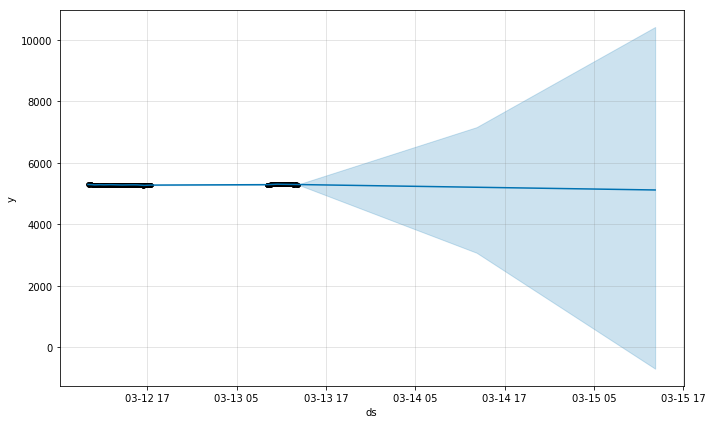

In [12]:
df1 = train_predict
df1['close_c']=df1['closePrice.bid']
df1['y'] =(df1['closePrice.bid'])
#df1['y'] = np.log(df1['y'])

df1['ds']=df1['snapshotTime']
model = Prophet(yearly_seasonality=True)
df1 = df1[['ds','y']]

model.fit(df1);

future = model.make_future_dataframe(periods=2) 
forecast = model.predict(future)
figure=model.plot(forecast)
pl.offline.plot(figure, filename = "prediction")
#yearly_seasonality=True
#forecast.head()

In [ ]:
forecast

In [ ]:
n,m = forecast.shape
r = (forecast['yhat'][n-1] - forecast['yhat'][n-10-1])/forecast['yhat'][n-1]
forecast['yhat'][n-1]

In [ ]:
from sklearn.externals import joblib
from flask import Flask, abort, jsonify, request, render_template
import numpy as np
import json
joblib.dump(model, 'model.pkl')

app = Flask(__name__)

prophet = joblib.load('model.pkl')


@app.route('/api', methods=['GET'])
def get_delay():
    p = request.args['periode']
    future = prophet.make_future_dataframe(periods=int(p)) 
    forecast = prophet.predict(future)
    # return a json value
    n,m = forecast.shape
    r = (forecast['yhat'][n-1] - forecast['yhat'][n-p-1])/forecast['yhat'][n-1]
    t=r*100
    return json.dumps({'rendement':t});

if __name__ == '__main__':
    app.run(port=5000, debug=True)

In [ ]:
forecast_filtered = forecast.iloc[:train_predict.shape[0]]
train_predict.reset_index()
forecast_filtered.reset_index()
result = pd.concat([train_predict, forecast_filtered], axis=1, join_axes=[train_predict.index])


In [ ]:
result['closePrice.bid']=(result['closePrice.bid'])
result

In [ ]:
trace1=go.Scatter(x=result.snapshotTime, y=result['closePrice.ask'], name="closePrice", line = dict(color = '#17BECF'), opacity = 0.8)
trace2=go.Scatter(x=result.snapshotTime, y=result['yhat'], name="yhat", line=dict(color='#7F7F7F'), opacity=0.8)
data = [trace1,trace2]
fig2= dict(data=data,layout=layout2)
#pl.offline.plot(fig, filename = "Manually Set Range.html")
pl.offline.plot(fig2, filename = "predict.html")


In [ ]:
"""
df1 = train_data
df1['Low_c']=df1['Low']
df1['y'] = np.log(df1['Low'])
df1['ds']=df1['Date']
model = Prophet()

model.fit(df1);

future = model.make_future_dataframe(periods=365) 
forecast = model.predict(future)
figure=model.plot(forecast)
"""

# Utilisation des réseau de neurone artificiel 

In [ ]:
import numpy as np
import pandas as pd
import talib
import random
import pandas_datareader.data as web


In [ ]:
random.seed(42)

# Préparation de données

In [ ]:
dataset =train_data

In [ ]:
dataset=train_data
dataset
dataset = dataset[['closePrice.bid', 'highPrice.bid', 'lowPrice.bid', 'openPrice.bid']]

In [ ]:
dataset['H-L'] = dataset['highPrice.bid'] - dataset['closePrice.bid']
dataset['O-C'] = dataset['closePrice.bid'] - dataset['openPrice.bid']
dataset['3day MA'] = dataset['closePrice.bid'].shift(1).rolling(window = 3).mean()
dataset['10day MA'] = dataset['closePrice.bid'].shift(1).rolling(window = 10).mean()
dataset['30day MA'] = dataset['closePrice.bid'].shift(1).rolling(window = 30).mean()
dataset['Std_dev']= dataset['closePrice.bid'].rolling(5).std()
dataset['RSI'] = talib.RSI(dataset['closePrice.bid'].values, timeperiod = 9)
dataset['Williams %R'] = talib.WILLR(dataset['highPrice.bid'].values, dataset['closePrice.bid'].values, dataset['closePrice.bid'].values, 7)


In [ ]:
dataset['Price_Rise'] = np.where(dataset['closePrice.bid'].shift(-1) > dataset['closePrice.bid'], 1, 0)

In [ ]:
dataset = dataset.dropna()

In [ ]:
X = dataset.iloc[:, 4:-1]
y = dataset.iloc[:, -1]

# Splitting the dataset

In [ ]:
split = int(len(dataset)*0.8)
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
import tensorflow as tf


In [ ]:
classifier = Sequential()

In [ ]:
classifier.add(Dense(units = 128, kernel_initializer = 'uniform', activation = 'relu', input_dim = X_train.shape[1]))

In [ ]:
classifier.add(Dense(units = 128, kernel_initializer = 'uniform', activation = 'relu'))

In [ ]:
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))


In [ ]:
classifier.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['accuracy'])

In [ ]:
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100)

In [ ]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [ ]:
dataset['y_pred'] = np.NaN
dataset.iloc[(len(dataset) - len(y_pred)):,-1:] = y_pred
trade_dataset = dataset.dropna()

In [ ]:
trade_dataset['Tomorrows Returns'] = 0.
trade_dataset['Tomorrows Returns'] = np.log(trade_dataset['closePrice.bid']/trade_dataset['closePrice.bid'].shift(1))
trade_dataset['Tomorrows Returns'] = trade_dataset['Tomorrows Returns'].shift(-1)

In [ ]:
trade_dataset['Strategy Returns'] = 0.
trade_dataset['Strategy Returns'] = np.where(trade_dataset['y_pred'] == True, trade_dataset['Tomorrows Returns'], - trade_dataset['Tomorrows Returns'])

In [ ]:
trade_dataset['Cumulative Market Returns'] = np.cumsum(trade_dataset['Tomorrows Returns'])
trade_dataset['Cumulative Strategy Returns'] = np.cumsum(trade_dataset['Strategy Returns'])

In [ ]:
trade_dataset.head(100)

In [ ]:
trace1=go.Scatter(x=trade_dataset.index, y=trade_dataset['Cumulative Market Returns'], name="Market Returns", line = dict(color = '#17BECF'), opacity = 0.8)
trace2=go.Scatter(x=trade_dataset.index, y=trade_dataset['Cumulative Strategy Returns'], name="Strategy Returns", line=dict(color='#7F7F7F'), opacity=0.8)

data=[trace1,trace2]
layout2 = dict(
    title='Time Series with Rangeslider',
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label='1m',
                     step='month',
                     stepmode='backward'),
                dict(count=6,
                     label='6m',
                     step='month',
                     stepmode='backward'),
                dict(count=1,
                    label='YTD',
                    step='year',
                    stepmode='todate'),
                
                dict(count=1,
                    label='1y',
                    step='year',
                    stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(),
        type='snapshotTime'
    )
)


fig2= dict(data=data,layout=layout2)
#pl.offline.plot(fig, filename = "Manually Set Range.html")
pl.offline.plot(fig2, filename = "update_button'")


In [ ]:
from sklearn.externals import joblib
joblib.dump(forecast, 'model1.pkl')

gbr= joblib.load('model1.pkl')
print("the best price for this Dacia is",gbr)
